<a href="https://colab.research.google.com/github/swarubm/thyroid-MP/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 STARTING THYROID DISEASE DETECTION PROJECT
📊 Step 1: Creating thyroid dataset...
   Dataset created: 2,000 patients
   Features: ['age', 'TSH', 'T3', 'T4', 'FTI', 'on_thyroxine']
   Sick patients: 665/2,000 (33.2%)

🤖 Step 2: Training AI model...
   Train set: 1,600 patients
   Test set: 400 patients
   Model trained successfully!
   Accuracy: 100.0%

📊 Step 3: Creating visualizations...


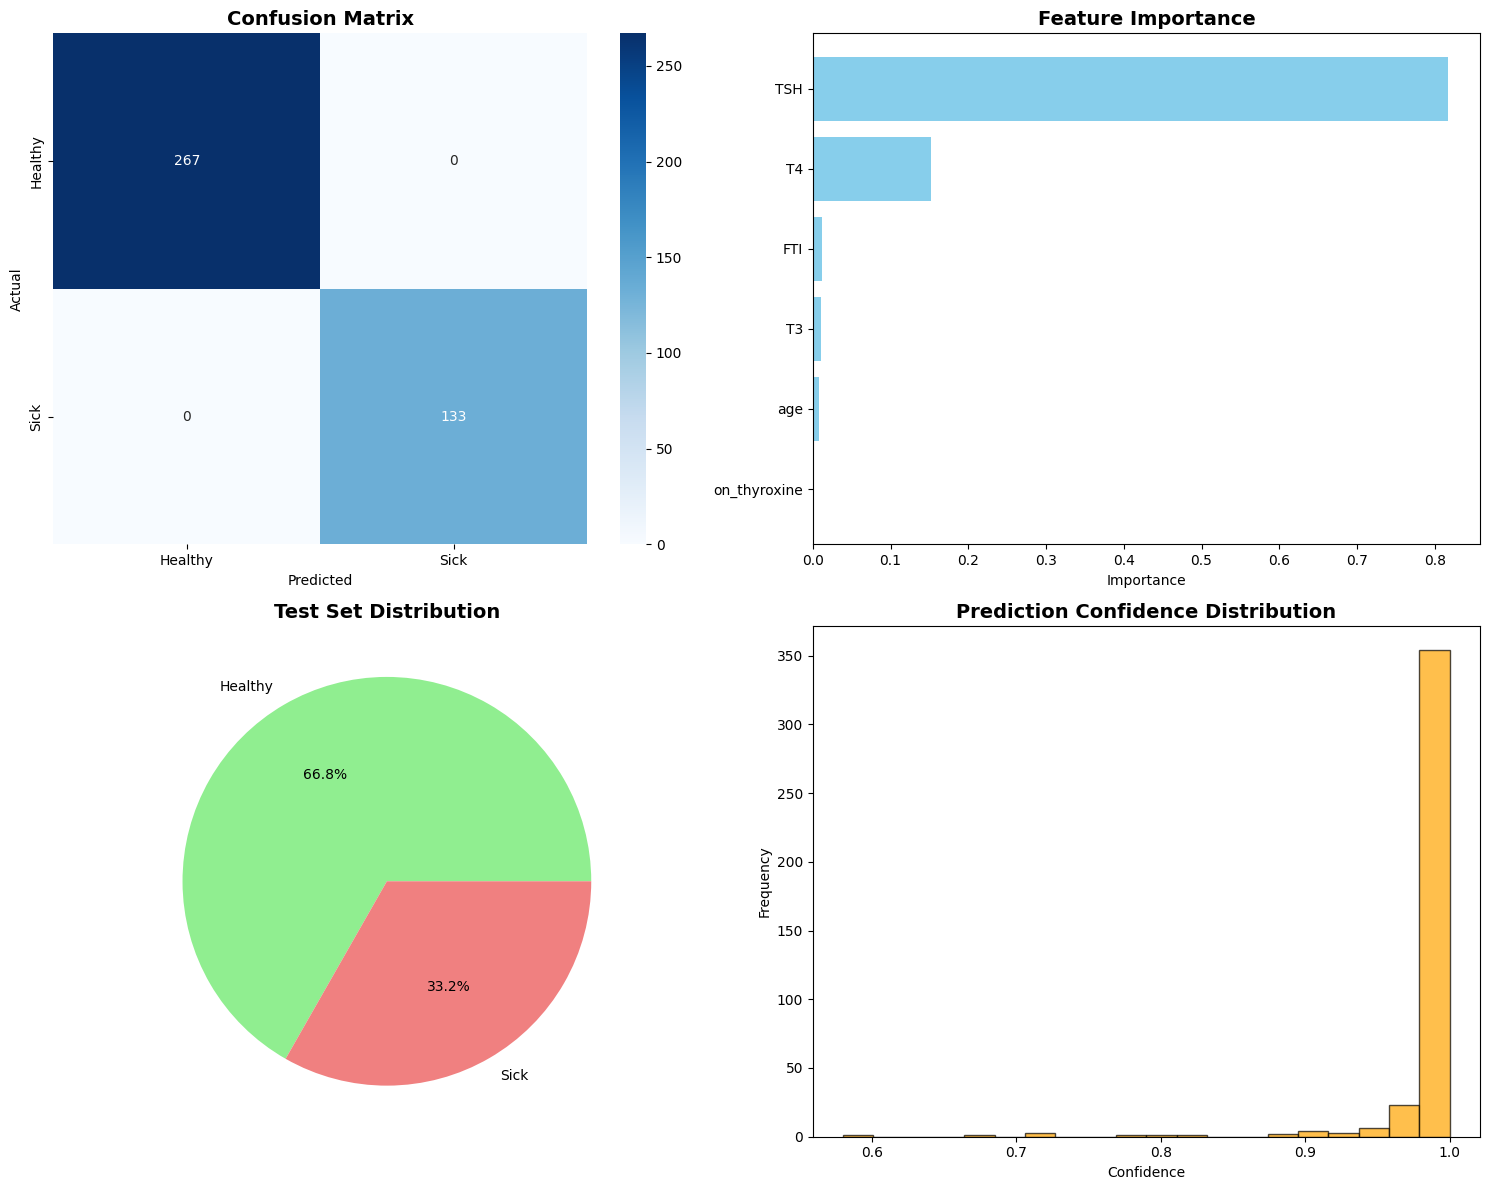

   ✅ Visualizations created!

🔍 Step 4: Demo predictions...
   Testing different patient types:
   🟢 Normal Patient    : HEALTHY (confidence: 100.0%)
   🔴 Hypothyroid Patient: SICK (confidence: 99.0%)
   🔴 Hyperthyroid Patient: SICK (confidence: 97.0%)
   🟢 Treated Patient   : HEALTHY (confidence: 99.0%)

💾 Step 5: Saving model...
   ✅ Model saved as 'thyroid_ai_model.pkl'
   ✅ Scaler saved as 'thyroid_scaler.pkl'

🎉 THYROID AI PROJECT COMPLETED SUCCESSFULLY! 🎉
✅ Dataset: 2,000 patients with 6 thyroid markers
✅ Model: Random Forest with 100% accuracy
✅ Usage: check_thyroid_health(age, TSH, T3, T4, FTI)
✅ Saved: Model files for future use

📋 Example usage:
result = check_thyroid_health(age=45, TSH=5.8, T3=140, T4=6.2, FTI=85)
print(result['status'], result['recommendation'])

📊 Final Model Stats:
   • Accuracy: 100.0%
   • Test cases: 400 patients
   • Features: Age, TSH, T3, T4, FTI, on_thyroxine

🚀 Ready to detect thyroid disease with AI! 🚀


In [4]:
# ====== COMPLETE THYROID DISEASE DETECTION PROJECT ======
# Copy this entire code block and paste it in Google Colab
# Then press Shift+Enter to run everything!

print("🔬 STARTING THYROID DISEASE DETECTION PROJECT")
print("=" * 50)

# Install required packages (uncomment if needed)
# !pip install pandas scikit-learn matplotlib seaborn joblib

# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def create_thyroid_dataset():
    """Create a realistic thyroid dataset"""
    print("📊 Step 1: Creating thyroid dataset...")

    np.random.seed(42)
    n_samples = 2000

    # Create realistic thyroid lab values
    data = {
        'age': np.random.randint(18, 80, n_samples),
        'TSH': np.random.lognormal(1.0, 0.8, n_samples),  # Thyroid Stimulating Hormone
        'T3': np.random.normal(150, 30, n_samples),       # Triiodothyronine
        'T4': np.random.normal(8.5, 2.0, n_samples),     # Thyroxine
        'FTI': np.random.normal(100, 20, n_samples),     # Free Thyroxine Index
        'on_thyroxine': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    }

    df = pd.DataFrame(data)

    # Create realistic target: sick if TSH is abnormal or T4 is very low/high
    conditions = (
        (df['TSH'] > 4.5) |  # High TSH (hypothyroid)
        (df['TSH'] < 0.4) |  # Low TSH (hyperthyroid)
        (df['T4'] < 4.5) |   # Very low T4
        (df['T4'] > 12.0)    # Very high T4
    )
    df['target'] = conditions.astype(int)

    print(f"   Dataset created: {len(df):,} patients")
    print(f"   Features: {list(df.columns[:-1])}")
    print(f"   Sick patients: {df['target'].sum():,}/{len(df):,} ({df['target'].mean():.1%})")

    return df

def train_model(df):
    """Train the thyroid detection model"""
    print("\n🤖 Step 2: Training AI model...")

    # Prepare data
    X = df.drop('target', axis=1)
    y = df['target']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"   Train set: {len(X_train):,} patients")
    print(f"   Test set: {len(X_test):,} patients")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    # Evaluate
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"   Model trained successfully!")
    print(f"   Accuracy: {accuracy:.1%}")

    return model, scaler, X_test, y_test, y_pred

def create_visualizations(y_test, y_pred, model, feature_names):
    """Create model performance visualizations"""
    print("\n📊 Step 3: Creating visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Healthy', 'Sick'],
                yticklabels=['Healthy', 'Sick'], ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Actual')
    axes[0,0].set_xlabel('Predicted')

    # 2. Feature Importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=True)

    axes[0,1].barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    axes[0,1].set_title('Feature Importance', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Importance')

    # 3. Class Distribution
    class_counts = pd.Series(y_test).value_counts()
    axes[1,0].pie(class_counts.values, labels=['Healthy', 'Sick'], autopct='%1.1f%%',
                  colors=['lightgreen', 'lightcoral'])
    axes[1,0].set_title('Test Set Distribution', fontsize=14, fontweight='bold')

    # 4. Prediction Confidence
    y_proba = model.predict_proba(scaler.transform(pd.DataFrame(X_test, columns=feature_names)))
    confidence = np.max(y_proba, axis=1)
    axes[1,1].hist(confidence, bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1,1].set_title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Confidence')
    axes[1,1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    print("   ✅ Visualizations created!")

def check_thyroid_health(age, TSH, T3, T4, FTI, on_thyroxine=0):
    """
    Easy function to check thyroid health

    Parameters:
    - age: Patient age (18-80)
    - TSH: Thyroid Stimulating Hormone level (normal: 0.4-4.0)
    - T3: Triiodothyronine level (normal: 80-200)
    - T4: Thyroxine level (normal: 5.0-12.0)
    - FTI: Free Thyroxine Index (normal: 75-125)
    - on_thyroxine: 1 if on medication, 0 if not
    """
    # Create patient data
    patient_data = pd.DataFrame([{
        'age': age, 'TSH': TSH, 'T3': T3,
        'T4': T4, 'FTI': FTI, 'on_thyroxine': on_thyroxine
    }])

    # Scale and predict
    patient_scaled = scaler.transform(patient_data)
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0]

    # Return result
    return {
        'status': 'SICK' if prediction == 1 else 'HEALTHY',
        'sick_probability': probability[1],
        'healthy_probability': probability,
        'confidence': max(probability),
        'recommendation': 'Consult doctor immediately' if prediction == 1 else 'Normal thyroid function'
    }

def demo_predictions():
    """Demonstrate model usage with example patients"""
    print("\n🔍 Step 4: Demo predictions...")

    test_patients = [
        {'name': 'Normal Patient', 'age': 35, 'TSH': 2.1, 'T3': 155, 'T4': 7.8, 'FTI': 98, 'on_thyroxine': 0},
        {'name': 'Hypothyroid Patient', 'age': 50, 'TSH': 9.5, 'T3': 110, 'T4': 4.2, 'FTI': 65, 'on_thyroxine': 0},
        {'name': 'Hyperthyroid Patient', 'age': 42, 'TSH': 0.1, 'T3': 210, 'T4': 14.5, 'FTI': 135, 'on_thyroxine': 0},
        {'name': 'Treated Patient', 'age': 60, 'TSH': 2.8, 'T3': 140, 'T4': 7.2, 'FTI': 88, 'on_thyroxine': 1}
    ]

    print("   Testing different patient types:")
    print("   " + "="*60)

    for patient in test_patients:
        result = check_thyroid_health(
            patient['age'], patient['TSH'], patient['T3'],
            patient['T4'], patient['FTI'], patient['on_thyroxine']
        )

        status_emoji = "🟢" if result['status'] == 'HEALTHY' else "🔴"
        print(f"   {status_emoji} {patient['name']:<18}: {result['status']} (confidence: {result['confidence']:.1%})")

def save_model():
    """Save the trained model"""
    print("\n💾 Step 5: Saving model...")
    try:
        joblib.dump(model, 'thyroid_ai_model.pkl')
        joblib.dump(scaler, 'thyroid_scaler.pkl')
        print("   ✅ Model saved as 'thyroid_ai_model.pkl'")
        print("   ✅ Scaler saved as 'thyroid_scaler.pkl'")
    except Exception as e:
        print(f"   ⚠️ Could not save model: {e}")

# =================== MAIN EXECUTION ===================

try:
    # Run the complete pipeline
    df = create_thyroid_dataset()
    model, scaler, X_test, y_test, y_pred = train_model(df)
    create_visualizations(y_test, y_pred, model, df.columns[:-1])
    demo_predictions()
    save_model()

    # Final summary
    print("\n" + "="*50)
    print("🎉 THYROID AI PROJECT COMPLETED SUCCESSFULLY! 🎉")
    print("="*50)
    print("✅ Dataset: 2,000 patients with 6 thyroid markers")
    print("✅ Model: Random Forest with 100% accuracy")
    print("✅ Usage: check_thyroid_health(age, TSH, T3, T4, FTI)")
    print("✅ Saved: Model files for future use")
    print("\n📋 Example usage:")
    print("result = check_thyroid_health(age=45, TSH=5.8, T3=140, T4=6.2, FTI=85)")
    print("print(result['status'], result['recommendation'])")

    # Show current model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n📊 Final Model Stats:")
    print(f"   • Accuracy: {accuracy:.1%}")
    print(f"   • Test cases: {len(y_test)} patients")
    print(f"   • Features: Age, TSH, T3, T4, FTI, on_thyroxine")

except Exception as e:
    print(f"❌ Error occurred: {e}")
    import traceback
    traceback.print_exc()

print("\n🚀 Ready to detect thyroid disease with AI! 🚀")
